# Решающие деревья

**Примечание:**

Для данного блокнота понадобятся pydotplus (питоновский модуль) и GraphViz

conda install -c conda-forge graphviz

conda install -c anaconda pydotplus

In [1]:
import pydotplus 
import pandas as pd
import numpy as np

from IPython.display import Image
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

## Human resources analytics

## Данные

In [2]:
data = pd.read_csv('HR.csv')
data[:5]

,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.53,2,157,3,0,1,0
1,0.86,5,262,6,0,0,0
2,0.88,7,272,4,0,1,0
3,0.87,5,223,5,0,1,0
4,0.52,2,159,3,0,1,0


In [3]:
target = 'left'
features = [c for c in data if c != target]
print(features)

['last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']


## Строим дерево с помощью sklearn

In [4]:
model = tree.DecisionTreeClassifier()
model.fit(data[features], data[target])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### основные параметры
max_depth

max_features

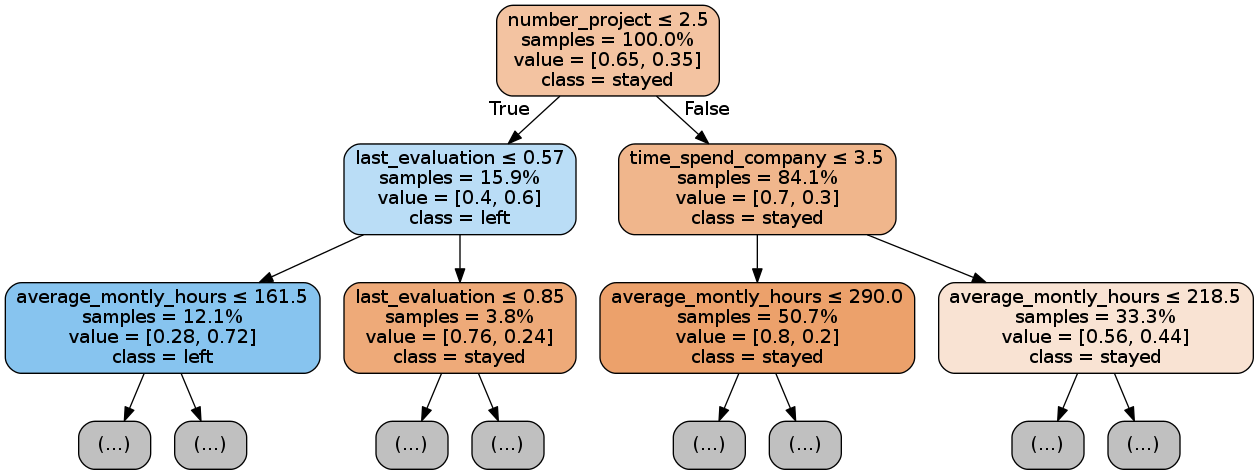

In [5]:
class_names = ['stayed', 'left']

def plot_tree(model, out_file, max_depth):

    dot_data = tree.export_graphviz(decision_tree=model, out_file=out_file,
                                    max_depth=max_depth,
                                    feature_names=features,
                                    class_names=class_names,
                                    filled=True, rounded=True,  
                                    special_characters=True,
                                    proportion = True, precision=2,
                                    label='all', impurity=False,
                                   )  

    graph = pydotplus.graphviz.graph_from_dot_file(out_file)  
    return Image(graph.create_png())
    
plot_tree(model, out_file="small_tree.out", max_depth=2)